# Deep Sea Coral Aquarium, Malibu

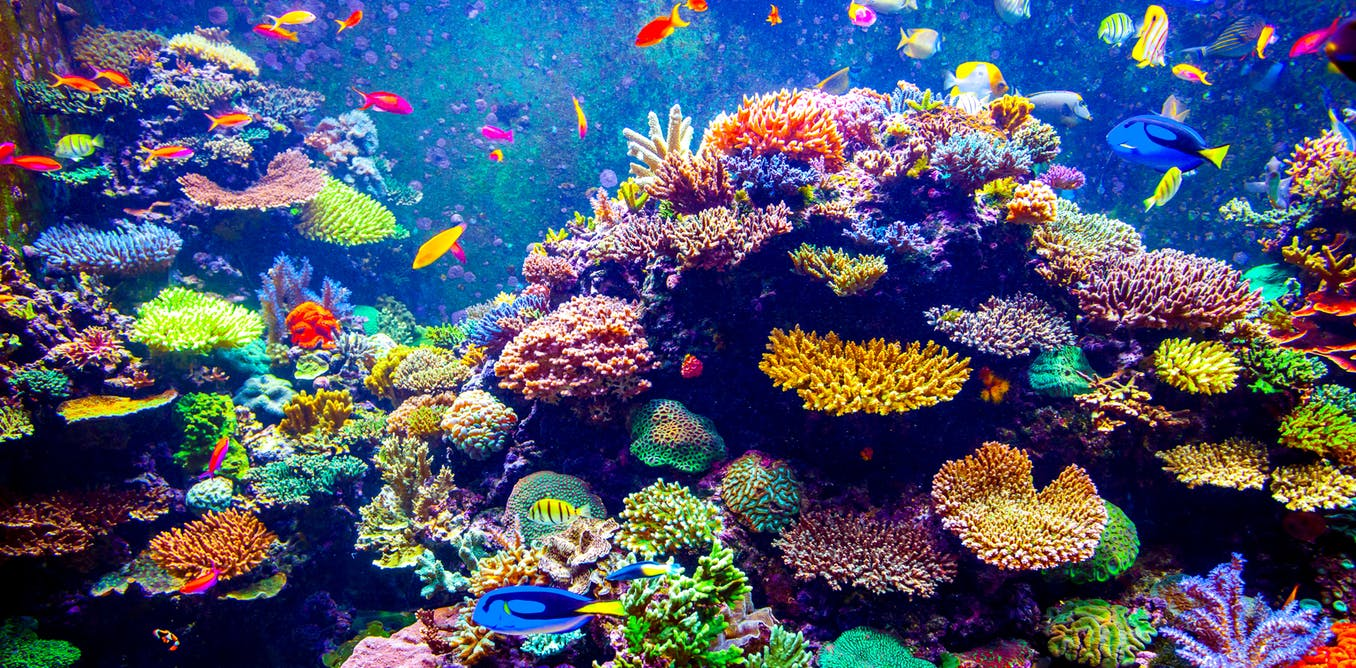

North West Kardashian and X Æ A-12 Musk are all grown up. Recently their parents have died,* and they have inherited their parent’s estates. They want to do something good with the money, you know, like invest in the community or something.

They have always been astonished by the wonders of the ocean, so they agree to join their fortunes to build a ginormous aquarium in downtown Malibu. For the aquarium’s feature attraction, they want an exhibit on deep sea coral reefs.

Naturally, they needed to hire the best data scientist in the business (yours truly). North West wants to obtain the coral in like a really sustainable way or something. For X Æ A-12, it’s critical that we obtain the coral in a cost effective manner, using the cheapest extraction methods possible, because evidently rocket science isn’t as profitable as social media.

_*Elon died when his spaceship exploded on the way to Mars & Kim died because Kayne. Because Kayne._

### Here are the requirements:

What coral types and species are the most numerically abundant?

    North West's wants to dedicate the museum to her father, who always loved fish. So it's important we don't destroy fish habitats.

What coral can be taken from shallower waters, utilizing cheaper methods extraction methods?
    
    Mr. Musk used his father’s company to do some research and concluded that net, trawl, dredge, grab, scuba,
    longline, and AUV are cheaper extraction methods. ROV and submersible are more expensive methods.

### Instantiated Variables for Data Exploration

    coral_type_count = Frequency of coral types

    coral_species_count = Frequency of coral species

    coral_types_total = Total number of coral types

    coral_species_total = Total number of coral species

    coral_type_depth = Average depth in meters of all coral types

    coral_species_depth = Average depth in meters of each coral species
    
    coral_stats = Depth statistics, grouped by type, species

    coral_type_stats = Depth statistics for each type of coral

    coral_species_stats = Depth statistics for coral species
    
    coral_type_depth() = Query function to determine depth statistics for coral type
    
    coral_species_depth() = Query function to determine depth statistics for coral species
    
    coral_type_extract() = Query function to search for coral type extraction methods and depths. 
    
    coral_species_extract() = Query function to search for coral species extraction methods and depths. 
       

# Preparation

## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
coral = pd.read_table('deep_sea_corals.csv', sep=',')

C:\Users\Don\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7,8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Rename Columns

In [3]:
coral.columns

Index(['CatalogNumber', 'DataProvider', 'ScientificName',
       'VernacularNameCategory', 'TaxonRank', 'Station', 'ObservationDate',
       'latitude', 'longitude', 'DepthInMeters', 'DepthMethod', 'Locality',
       'LocationAccuracy', 'SurveyID', 'Repository', 'IdentificationQualifier',
       'EventID', 'SamplingEquipment', 'RecordType', 'SampleID'],
      dtype='object')

In [4]:
coral_cols = ['cat', 'provider', 'species',
       'coral_type', 'taxon', 'station', 'date',
       'lat', 'long', 'depth', 'depth_method', 'locality',
       'location_acc', 'survey', 'repo', 'id',
       'id_event', 'extract', 'rec_type', 'id_sample']

coral.columns = coral_cols

In [5]:
coral.columns

Index(['cat', 'provider', 'species', 'coral_type', 'taxon', 'station', 'date',
       'lat', 'long', 'depth', 'depth_method', 'locality', 'location_acc',
       'survey', 'repo', 'id', 'id_event', 'extract', 'rec_type', 'id_sample'],
      dtype='object')

## Data Clean

In [ ]:
coral.depth.min()

The minimum coral depth of -999 can greatly impact depth analysis, so I'm going to create a new DataFrame that does not include these rows.

In [6]:
coral2 = coral[coral.depth != -999]

### Nulls

For the objectives of this project, the following nulls will not greatly impact the analysis. The 176 null values for coral_type can be ignored, as value_counts do not count null values. Leaving 176 corals out of the total 513,373 will not have much of an impact. The other columns with high null values will not be needed.

In [7]:
coral2.shape

(509376, 20)

In [8]:
coral2.isnull().sum()

cat                  1
provider             1
species              1
coral_type         176
taxon                9
station         256017
date                 6
lat                  0
long                 0
depth                1
depth_method     12555
locality        123575
location_acc     28551
survey          207092
repo             16665
id               24652
id_event         37461
extract          27343
rec_type         12193
id_sample       107281
dtype: int64

# Coral Analysis

Ms. Kardashian West wants to know the top 5 most numerically abundant deep sea coral types and species. She also asked for how many unique coral types and species.

#### What are the most common types of deep sea coral?

In [9]:
coral_type_count = coral2.coral_type.value_counts()
coral_type_count.head(5)

gorgonian coral       142223
sponge unspecified     76928
sea pen                65381
glass sponge           55250
soft coral             38714
Name: coral_type, dtype: int64

#### What are the most common species of deep sea coral?

In [10]:
coral_species_count = coral2.species.value_counts()
coral_species_count.head(5)

Porifera                 76928
Heteropolypus ritteri    21447
Lophelia pertusa         20202
Pennatulacea             17664
Stylaster sp.            14593
Name: species, dtype: int64

#### How many unique types of deep sea coral?

In [11]:
coral_types_total = print('Total number of observed coral types = ', len(coral2.coral_type.value_counts()))
coral_types_total

Total number of observed coral types =  17


#### How many unique species of deep sea coral?

In [12]:
coral_species_total = print('Total number of observed coral species = ', len(coral2.species.value_counts()))
coral_species_total

Total number of observed coral species =  2870


# Depth Analysis

Extracting deep sea coral can be expensive, so Mr. Musk needs to know the depth statistics for all coral types and species, with a focus on the coral in shallower waters. Like his father, X Æ A-12 is really good at programming and probably could have saved a lot of time if he just wrote this code himself.

### Depth Statistics for All Coral Types and Species

#### What is the average depth of all coral types?

In [13]:
coral_type_depth = coral2.groupby('coral_type')['depth'].mean()
coral_type_depth

coral_type
black coral                    844.642232
calcareous sponge              316.588867
demosponge                     457.868124
glass sponge                  1353.765719
gold coral                     414.728195
gorgonian coral                865.583042
lace coral                     319.984316
lithotelestid coral            117.000000
other coral-like hydrozoan     905.794326
scleromorph sponge             181.280443
sea pen                        945.362032
soft coral                     765.944077
sponge unspecified             726.351459
stoloniferan coral             507.924230
stony coral (branching)        465.919569
stony coral (cup coral)        499.357353
stony coral (unspecified)      739.108904
Name: depth, dtype: float64

#### What is the average depth of all coral species?

In [14]:
coral_species_depth = coral2.groupby('species')['depth'].mean()
coral_species_depth.head(10)

species
Aaptos aaptos                   61.000000
Aaptos kanuux                  219.000000
Aaptos pernucleata              61.800000
Abyssocladia cf. lakwollii    2033.000000
Abyssopathes lyra             4278.000000
Abyssopathes lyriformis       3876.000000
Abyssopathes sp.              4718.500000
Abyssoprimnoa gemina          4142.750000
Acalycigorgia wireni           100.000000
Acanella arbuscula            1162.637755
Name: depth, dtype: float64

#### Depth Statistics, grouped by type, species

In [15]:
coral_stats = coral2.groupby(['coral_type', 'species'])['depth'].agg(['count', 'mean', 'median', 'max', 'min'])
coral_stats

count         mean  \
coral_type                species                                          
black coral               Abyssopathes lyra               5  4278.000000   
                          Abyssopathes lyriformis         3  3876.000000   
                          Abyssopathes sp.                2  4718.500000   
                          Acanthopathes cf. thyoides      4    92.750000   
                          Acanthopathes humilis          19   196.842105   
...                                                     ...          ...   
stony coral (unspecified) Eguchipsammia cornucopia       11   280.363636   
                          Eguchipsammia gaditana         16   270.687500   
                          Leptopenus antarcticus          6  2205.333333   
                          Scleractinia                 3337   829.056638   
                          cf. Dendrophylliidae            1   394.000000   

                                                      median     max     min  
coral_type                species                                             
black coral               Abyssopathes lyra           3749.0  5436.0  3020.0  
                          Abyssopathes lyriformis     3476.0  4892.0  3260.0  
                          Abyssopathes sp.            4718.5  4770.0  4667.0  
                          Acanthopathes cf. thyoides    92.5    94.0    92.0  
                          Acanthopathes humilis        159.0   494.0   132.0  
...                                                      ...     ...     ...  
stony coral (unspecified) Eguchipsammia cornucopia     176.0   805.0   125.0  
                          Eguchipsammia gaditana       219.0   505.0    65.0  
                          Leptopenus antarcticus      2095.0  2626.0  2008.0  
                          Scleractinia                 899.0  3253.0    16.0  
                          cf. Dendrophylliidae         394.0   394.0   394.0  

[2867 rows x 5 columns]

#### Depth Statistics for All Coral Types

In [16]:
coral_type_stats1 = coral2.groupby('coral_type')['depth'].agg(['count', 'mean', 'median', 'max', 'min'])
coral_type_stats = coral_type_stats1.sort_values(ascending=False, by='count')
coral_type_stats

,count,mean,median,max,min
coral_type,,,,,
gorgonian coral,142223,865.583042,644.0,5106.0,0.0
sponge unspecified,76928,726.351459,399.0,5020.0,5.0
sea pen,65381,945.362032,828.0,6369.0,1.0
glass sponge,55250,1353.765719,1259.0,5008.0,32.0
soft coral,38714,765.944077,732.0,4216.0,8.0
demosponge,38233,457.868124,175.0,4765.0,16.0
black coral,26070,844.642232,484.0,5436.0,0.0
stony coral (branching),24779,465.919569,486.0,4416.0,42.0
lace coral,21423,319.984316,266.0,5845.0,0.0


#### Depth Statistics for All Coral Species

In [17]:
coral_species_stats1 = coral2.groupby('species')['depth'].agg(['count', 'mean', 'median', 'max', 'min'])
coral_species_stats = coral_species_stats1.sort_values(ascending=False, by='count').head(10)
coral_species_stats

,count,mean,median,max,min
species,,,,,
Porifera,76928,726.351459,399.0,5020.0,5.0
Heteropolypus ritteri,21447,886.314123,829.0,3330.0,35.0
Lophelia pertusa,20202,484.888130,486.0,4416.0,48.0
Pennatulacea,17664,1219.415874,896.0,3972.0,11.0
Stylaster sp.,14593,230.457891,265.0,2124.0,0.0
Hexactinellida,10437,1154.316183,854.0,4850.0,42.0
Gorgonacea,9854,352.793383,317.0,4700.0,27.0
Paragorgia sp.,9416,953.633071,734.0,4699.0,0.0
Farrea occa,7977,1308.982826,1291.0,3440.0,129.0


### Depth Statistics for Specifc Coral Types and Species

#### Query for Specific Coral Type Depth Statistics

Here are the coral types North West picked:
    
    gorgonian coral
    sponge unspecified
    sea pen
    glass sponge
    soft coral

In [18]:
#Creates function coral_type_depth1, which defines type_name that will be used in coral_type_depth
def coral_type_depth1(type_name):
    return coral_type_stats.loc[type_name, :]

In [19]:
coral_type_depth1('sea pen')

count     65381.000000
mean        945.362032
median      828.000000
max        6369.000000
min           1.000000
Name: sea pen, dtype: float64

In [20]:
#Query for coral type depth stats
def coral_type_depth():
    type_name = input('What coral type depth do you wanna know about, X Æ A-12? ')
    return coral_type_stats.loc[type_name, :]

In [22]:
coral_type_depth()

What coral type depth do you wanna know about, X Æ A-12? soft coral


count     38714.000000
mean        765.944077
median      732.000000
max        4216.000000
min           8.000000
Name: soft coral, dtype: float64

#### Query for Specific Coral Species Depth Statistics

Here are the coral species North West picked:

    Porifera
    Heteropolypus ritteri
    Lophelia pertusa
    Pennatulacea
    Stylaster sp.

In [23]:
#Creates function coral_species_depth1, which defines species_name that will be used in coral_species_depth
def coral_species_depth1(species_name):
    return coral_species_stats1.loc[species_name, :]

In [24]:
coral_species_depth1('Lophelia pertusa')

count     20202.00000
mean        484.88813
median      486.00000
max        4416.00000
min          48.00000
Name: Lophelia pertusa, dtype: float64

In [25]:
#Query for coral species depth stats
def coral_species_depth():
    species_name = input('What coral species depth do you wanna know about, X Æ A-12? ')
    return coral_species_stats1.loc[species_name, :]

In [26]:
coral_species_depth()

What coral species depth do you wanna know about, X Æ A-12? Porifera


count     76928.000000
mean        726.351459
median      399.000000
max        5020.000000
min           5.000000
Name: Porifera, dtype: float64

# Extraction Analysis

Mr. Musk wants to use one of the cheaper extraction methods that he mentioned, avoiding ROV and submersible extractions.

#### Query for Specific Coral Type Extraction Method

Let's take a look at the extraction methods and depths for the top 5 numerically abundant coral types North West asked for...

    gorgonian coral
    sponge unspecified
    sea pen
    glass sponge
    soft coral

In [27]:
# Creates a new set of columns that we want to focus on
coral_cols2 = ['coral_type', 'species','extract', 'depth']

In [28]:
#Creates function coral_extract1, which defines extract1 that will be used in coral_type_extract
def coral_type_extract1(extract1):
    return coral2[coral_cols2][(coral2['coral_type'] == extract1)].sort_values(ascending=False, by='depth')

In [29]:
coral_type_extract1('sea pen').tail()

,coral_type,species,extract,depth
359345,sea pen,Stylatula sp.,grab,8.0
359315,sea pen,Stylatula sp.,grab,6.0
111921,sea pen,Renilla reniformis,net,1.0
111887,sea pen,Renilla muelleri,net,1.0
111889,sea pen,Renilla sp.,NaN,1.0


In [30]:
#Query for coral type extractions
def coral_type_extract():
    extract1 = input('What coral type are we taking back to the aquarium, Mr. Musk? ')
    return coral2[coral_cols2][(coral2['coral_type'] == extract1)].sort_values(ascending=False, by='depth')

In [31]:
coral_type_extract()

What coral type are we taking back to the aquarium, Mr. Musk? gorgonian coral


,coral_type,species,extract,depth
197257,gorgonian coral,Dasystenella acanthina,trawl,5106.0
201186,gorgonian coral,Plexaurella sp.,NaN,5052.0
201166,gorgonian coral,Phyllogorgia sp.,NaN,5052.0
201054,gorgonian coral,Phyllogorgia dilatata,NaN,5052.0
176348,gorgonian coral,Muriceopsis sulphurea,NaN,5052.0
...,...,...,...,...
235796,gorgonian coral,Swiftia pacifica,ROV,0.0
292705,gorgonian coral,Paragorgia sp.,ROV,0.0
360682,gorgonian coral,Primnoa pacifica,ROV,0.0
360670,gorgonian coral,Primnoa pacifica,ROV,0.0


In [32]:
#To look at the shallowest depths
coral_type_extract().tail()

What coral type are we taking back to the aquarium, Mr. Musk? gorgonian coral


,coral_type,species,extract,depth
235796,gorgonian coral,Swiftia pacifica,ROV,0.0
292705,gorgonian coral,Paragorgia sp.,ROV,0.0
360682,gorgonian coral,Primnoa pacifica,ROV,0.0
360670,gorgonian coral,Primnoa pacifica,ROV,0.0
292753,gorgonian coral,Paragorgia sp.,ROV,0.0


#### Query for Specific Coral Species Extract Method

Now let's shift the focus to the top 5 most abundant coral species...

    Porifera
    Heteropolypus ritteri
    Lophelia pertusa
    Pennatulacea
    Stylaster sp.

In [33]:
# Creates a new set of columns that we want to focus on
coral_cols3 = ['species', 'coral_type', 'extract', 'depth']

In [34]:
#Creates function coral_extract2, which defines extract1 that will be used in coral_species_extract
def coral_species_extract2(extract2):
    return coral2[coral_cols3][(coral2['species'] == extract2)].sort_values(ascending=False, by='depth')

In [35]:
coral_species_extract2('Pennatulacea').tail()

,species,coral_type,extract,depth
63125,Pennatulacea,sea pen,trawl,20.0
62749,Pennatulacea,sea pen,trawl,18.0
63207,Pennatulacea,sea pen,trawl,16.0
63213,Pennatulacea,sea pen,trawl,13.0
63195,Pennatulacea,sea pen,trawl,11.0


In [36]:
#Query for coral species extractions
def coral_species_extract():
    extract2 = input('What coral species are we taking back to the aquarium, Mr. Musk? ' )
    return coral2[coral_cols3][(coral2['species'] == extract2)].sort_values(ascending=False, by='depth')

In [37]:
coral_species_extract()

What coral species are we taking back to the aquarium, Mr. Musk? Heteropolypus ritteri


,species,coral_type,extract,depth
135019,Heteropolypus ritteri,soft coral,ROV,3330.0
135020,Heteropolypus ritteri,soft coral,ROV,3329.0
135022,Heteropolypus ritteri,soft coral,ROV,3325.0
135021,Heteropolypus ritteri,soft coral,ROV,3313.0
148948,Heteropolypus ritteri,soft coral,ROV,3280.0
...,...,...,...,...
133558,Heteropolypus ritteri,soft coral,ROV,101.0
129587,Heteropolypus ritteri,soft coral,submersible,100.0
147524,Heteropolypus ritteri,soft coral,ROV,90.0
133770,Heteropolypus ritteri,soft coral,ROV,52.0


In [38]:
#To look at the shallowest depths
coral_species_extract().tail()

What coral species are we taking back to the aquarium, Mr. Musk? Heteropolypus ritteri


,species,coral_type,extract,depth
133558,Heteropolypus ritteri,soft coral,ROV,101.0
129587,Heteropolypus ritteri,soft coral,submersible,100.0
147524,Heteropolypus ritteri,soft coral,ROV,90.0
133770,Heteropolypus ritteri,soft coral,ROV,52.0
135379,Heteropolypus ritteri,soft coral,ROV,35.0


# Visualizations

### Observations of Species According to Coral Type

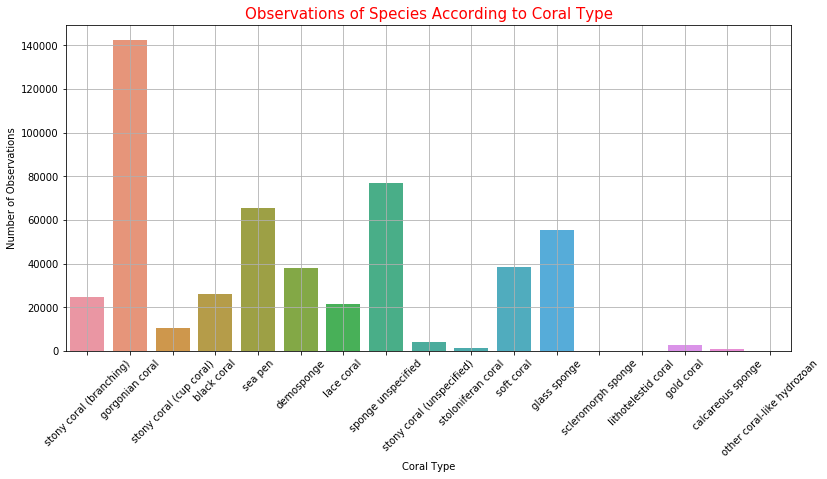

In [39]:
plt.figure(figsize=(13,6))
sns.countplot(coral2.coral_type)
plt.grid()
plt.title('Observations of Species According to Coral Type', fontsize=15, color='red')
plt.xlabel('Coral Type')
plt.ylabel('Number of Observations')
plt.xticks(rotation='45')
plt.show()

### Top 50 Most Observed Coral Species

In [41]:
# This creates a new DataFrame for the 50 most frequent species
coralSpeciesCount = pd.DataFrame(coral2.species.value_counts())
coralSpeciesCount2 = coralSpeciesCount.head(50)
coralSpeciesCount2.head(10)

,species
Porifera,76928
Heteropolypus ritteri,21447
Lophelia pertusa,20202
Pennatulacea,17664
Stylaster sp.,14593
Hexactinellida,10437
Gorgonacea,9854
Paragorgia sp.,9416
Farrea occa,7977
Funiculina sp.,7389


In [42]:
#Indexes through the 50 most frequent species, naming the column 'Species Name'
coralSpeciesCount2['Species Name'] = coralSpeciesCount2.index
coralSpeciesCount2.index = range(1,51,1)
#Renames the DataFrame column for the value_counts column, inplace, meaning permanent for this DF.
coralSpeciesCount2.rename(columns={'species':'Total Observations'}, inplace=True)
#Re-orders the column names
coral_data = coralSpeciesCount2.reindex(columns=['Species Name', 'Total Observations'])
coral_data.head()

C:\Users\Don\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Don\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Species Name,Total Observations
1,Porifera,76928
2,Heteropolypus ritteri,21447
3,Lophelia pertusa,20202
4,Pennatulacea,17664
5,Stylaster sp.,14593


[Text(0, 0.5, 'Observed Species'),
 Text(0.5, 0, 'Total Number Of Observations'),
 Text(0.5, 1.0, 'Top 50 Most Observed Coral Species')]

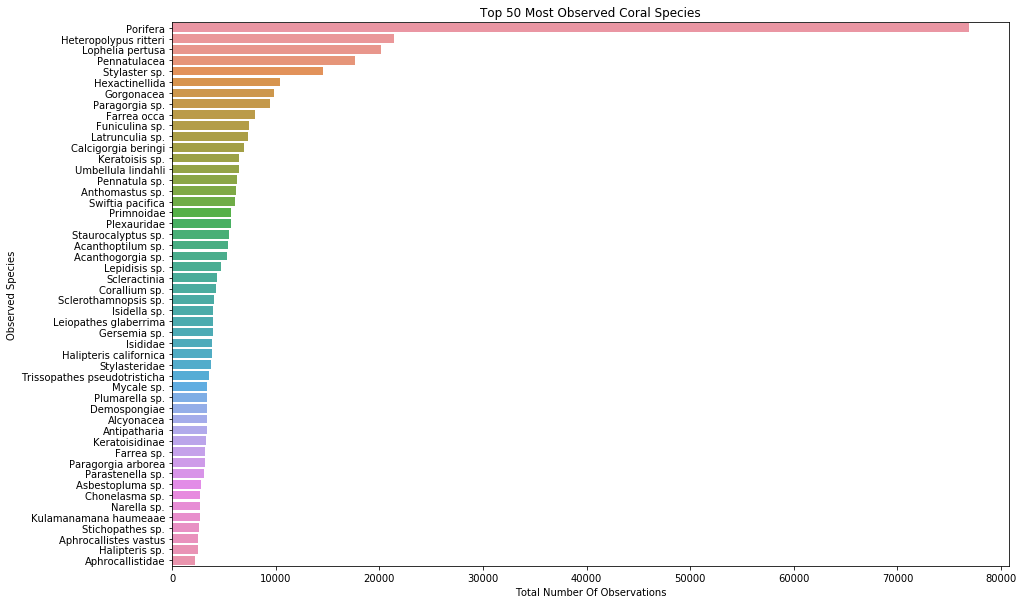

In [43]:
#Combines a matplotlib figure and a seaborn barplot to show most observed species,from coralSpeciesCount2.
plt.figure(figsize=(15,10))
ax = sns.barplot(x=coral_data['Total Observations'], y=coral_data['Species Name'])
ax.set(xlabel='Total Number Of Observations', ylabel='Observed Species', title='Top 50 Most Observed Coral Species')

# Summary

### What coral types and species are the most numerically abundant?

As the data shows below, gorgonian coral, sponges, sea pens, glass sponges, and soft coral are the most abundant types of coral North West can feature in the aquarium.

In [44]:
coral_type_count.head()

gorgonian coral       142223
sponge unspecified     76928
sea pen                65381
glass sponge           55250
soft coral             38714
Name: coral_type, dtype: int64

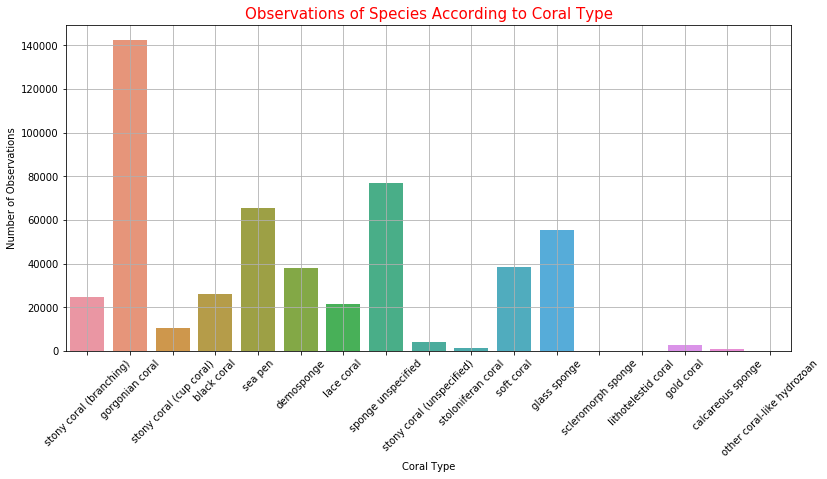

In [45]:
plt.figure(figsize=(13,6))
sns.countplot(coral2.coral_type)
plt.grid()
plt.title('Observations of Species According to Coral Type', fontsize=15, color='red')
plt.xlabel('Coral Type')
plt.ylabel('Number of Observations')
plt.xticks(rotation='45')
plt.show()

The most frequent coral species are Porifera, Heteropolypus ritteri, Lophelia pertusa, Pennatulacea, and Stylaster sp. North West should focus on these species of coral if she doesn't want to be responsible for the death of the ocean.

In [46]:
coral_species_count.head()

Porifera                 76928
Heteropolypus ritteri    21447
Lophelia pertusa         20202
Pennatulacea             17664
Stylaster sp.            14593
Name: species, dtype: int64

[Text(0, 0.5, 'Observed Species'),
 Text(0.5, 0, 'Total Number Of Observations'),
 Text(0.5, 1.0, 'Top 50 Most Observed Coral Species')]

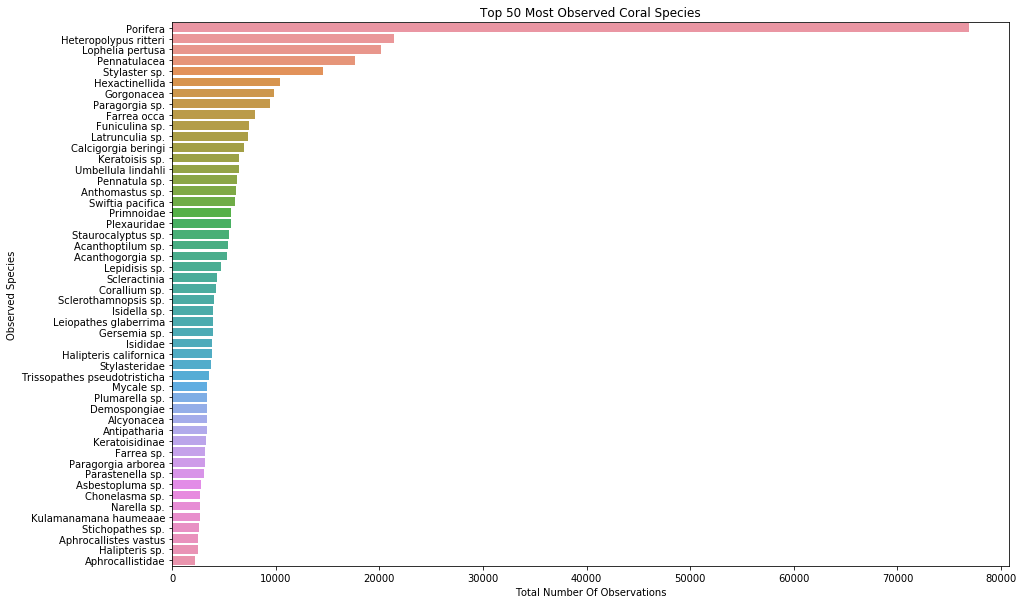

In [47]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=coral_data['Total Observations'], y=coral_data['Species Name'])
ax.set(xlabel='Total Number Of Observations', ylabel='Observed Species', title='Top 50 Most Observed Coral Species')

### What coral can be taken from shallower waters, utilizing cheaper methods extraction methods?

Coral Types
    
    ROVs are expensive and rocket ships don't pay for themselves. So gorgonian coral is out, as abundant as it may be.

    Sponges, sea pens, glass sponges, and soft coral can all be extracted by the cheaper methods (trawl, grab, net, 
    & scuba), so these are the types of coral they should be focused on for the new aquarium.

Coral Species

    Porifera and Pennatulacea are the most cost-effective species to extract.
    
    Forget about getting Heteropolypus ritteri, Lophelia pertusa, and Stylaster species for the aquarium,
    as you will need to buy an ROV or a submarine to get to those corals!

#### Ms. Kardashian-West coral type picks
    gorgonian coral
    sponge unspecified
    sea pen
    glass sponge
    soft coral

In [48]:
coral_type_extract().tail()

What coral type are we taking back to the aquarium, Mr. Musk? gorgonian coral


,coral_type,species,extract,depth
235796,gorgonian coral,Swiftia pacifica,ROV,0.0
292705,gorgonian coral,Paragorgia sp.,ROV,0.0
360682,gorgonian coral,Primnoa pacifica,ROV,0.0
360670,gorgonian coral,Primnoa pacifica,ROV,0.0
292753,gorgonian coral,Paragorgia sp.,ROV,0.0


#### Ms. Kardashian-West coral species picks
    Porifera
    Heteropolypus ritteri
    Lophelia pertusa
    Pennatulacea
    Stylaster sp.

In [49]:
coral_species_extract().tail()

What coral species are we taking back to the aquarium, Mr. Musk? Lophelia pertusa


,species,coral_type,extract,depth
381257,Lophelia pertusa,stony coral (branching),ROV,65.0
381241,Lophelia pertusa,stony coral (branching),ROV,65.0
381261,Lophelia pertusa,stony coral (branching),ROV,65.0
274412,Lophelia pertusa,stony coral (branching),submersible,52.0
274227,Lophelia pertusa,stony coral (branching),NaN,48.0


# Deep Sea Coral Aquarium, Malibu

We did it! North West and X Æ A-12 are proud of their new aquarium because we were able to successfully identify self-sustaining coral that was extracted by through the cheapest possible extraction methods.

Let's take a look at the new aquarium!

### Sea Sponge
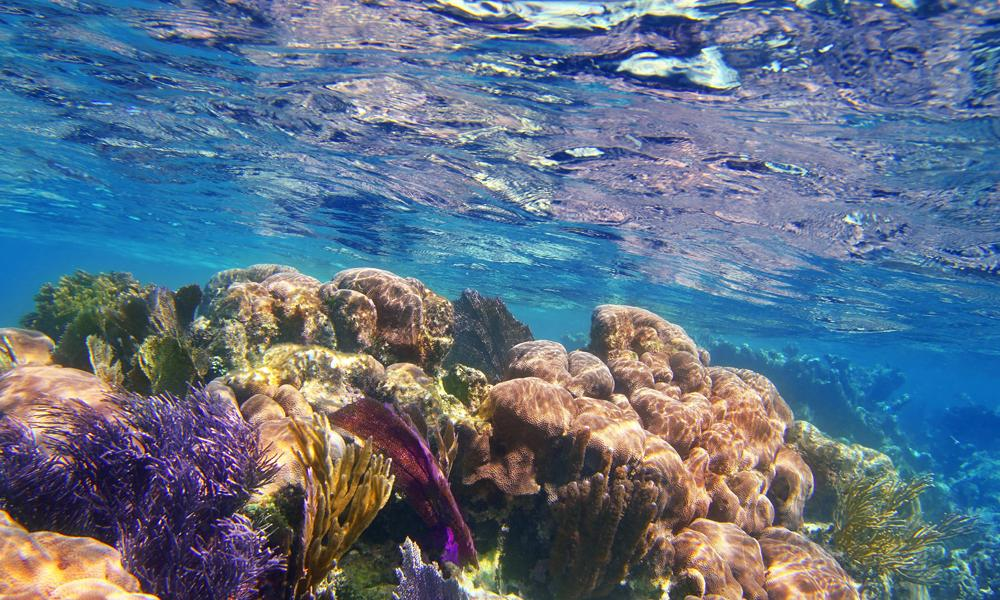

### Sea Pens
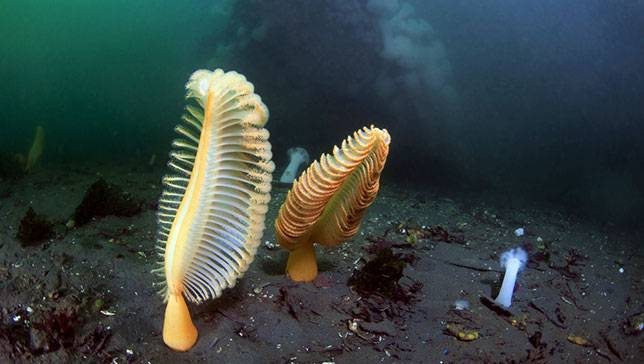

### Glass Sponge
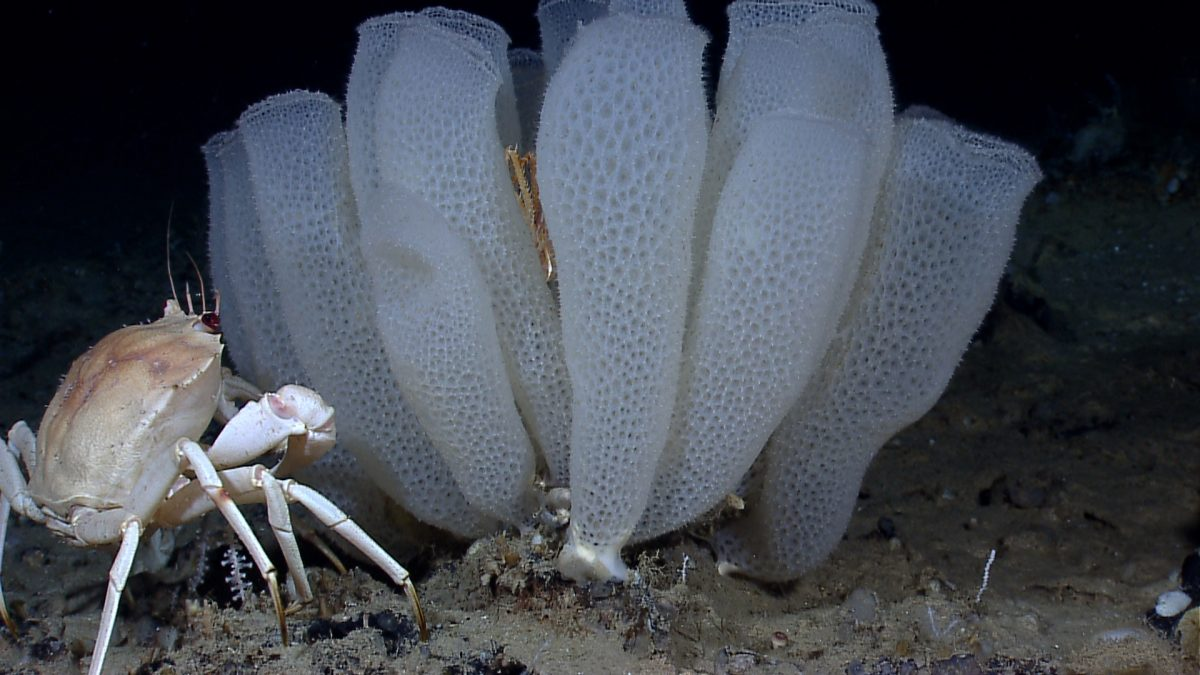

### Soft Coral
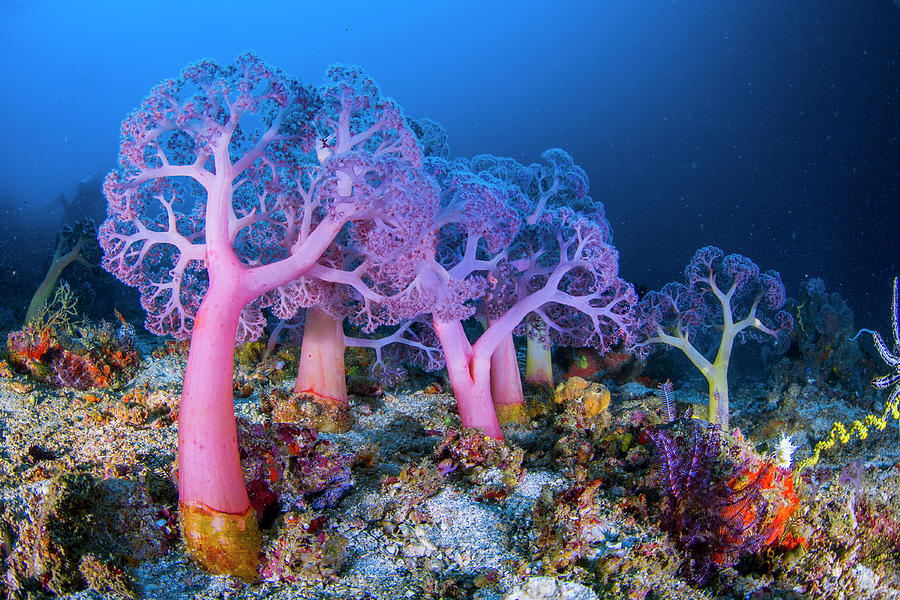

### Porifera
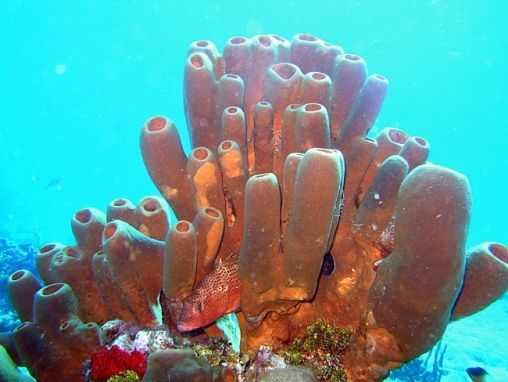

### Pennatulacea
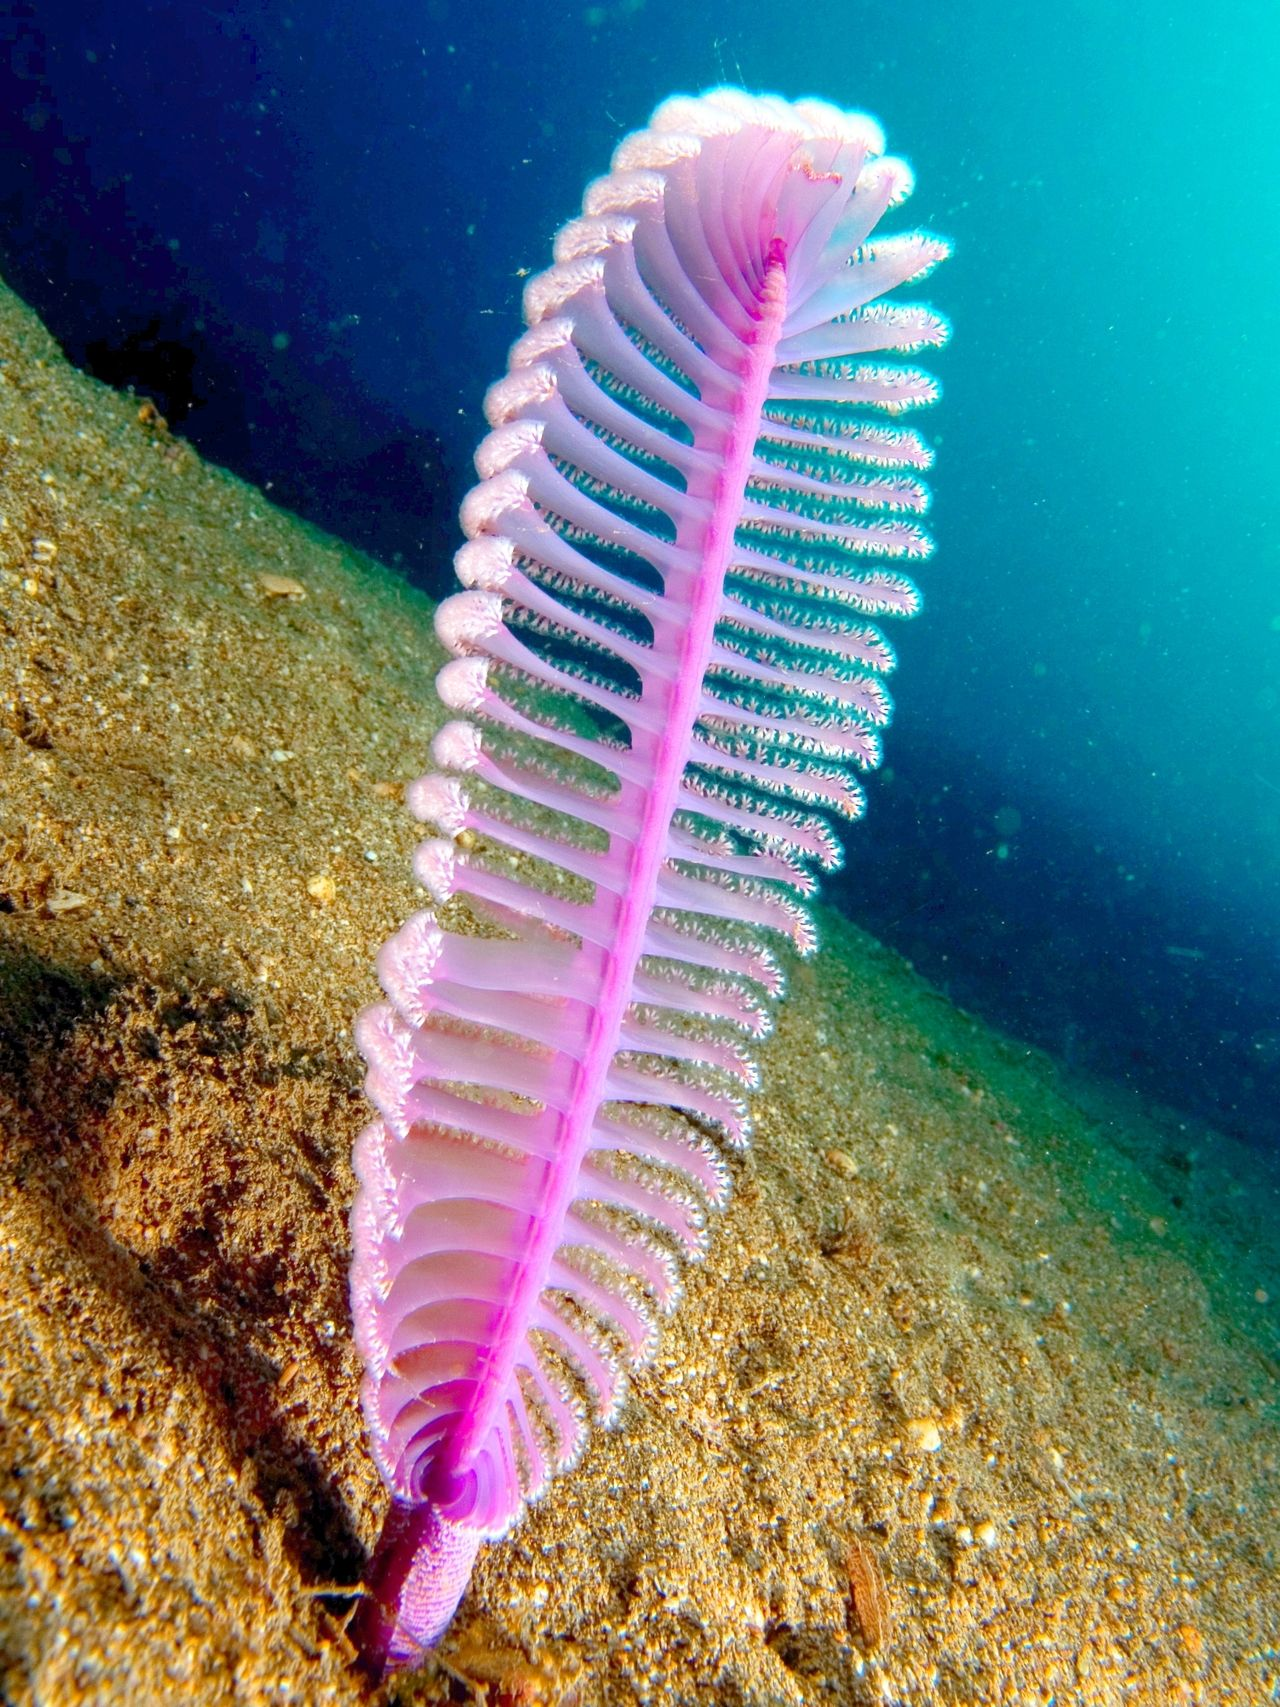

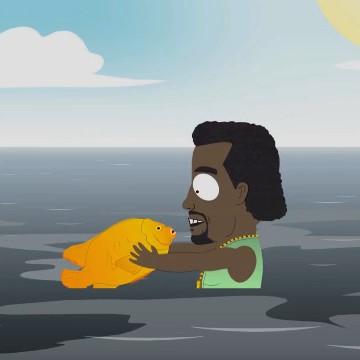